In [4]:
import cv2
import os
import matplotlib as mpl

In [5]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [6]:
class projector_param():
    def __init__(self,cols, rows):
        self.cols = cols
        self.rows = rows

In [7]:
projector = projector_param(1280, 720)

In [16]:
def update_pattern_bit_count(projector):
    cols = projector.cols
    rows = projector.rows
    vbits = 1
    hbits = 1
    i = 1<<vbits
    while(i<cols):
        vbits += 1
        i = 1<<vbits
    print(1<<vbits)
    i = 1<<hbits
    while(i<rows):
        hbits += 1
        i = 1<<hbits
    print(1<<hbits)

In [17]:
update_pattern_bit_count(projector)

2048
1024


In [84]:
def GenerateCalibrationBoard(row_size_pixels, column_size_pixels, board_rows, board_cols,projector):
	rows_in_pattern = board_rows + 1
	cols_in_pattern = board_cols + 1
	total_chessboard_pixels_rows = row_size_pixels * rows_in_pattern
	total_chessboard_pixels_cols = column_size_pixels * cols_in_pattern
	img = np.ones(shape=(projector.rows, projector.cols))*255
	for i in range(80, projector.rows-80):
		for j in range(240, projector.cols-240):
			if(((int)(j/row_size_pixels) + (int)(i/column_size_pixels))%2):
				img[i,j]=0
	return img

In [85]:
out = GenerateCalibrationBoard(80,80,100,100,projector)

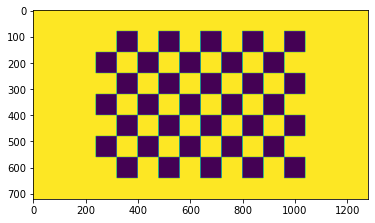

In [86]:
plt.imshow(out)

In [87]:
cv2.imwrite("chessboard.png", out)

True

In [20]:
import glob
img_set = glob.glob('../data/TI/cd_11_15/*.jpg')
img_set.sort()
print(len(img_set))

44


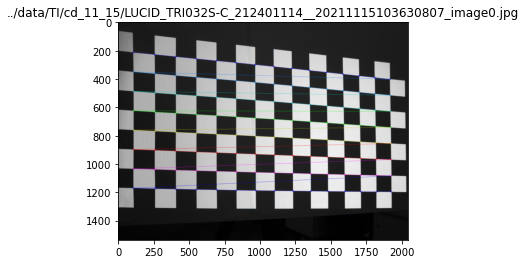

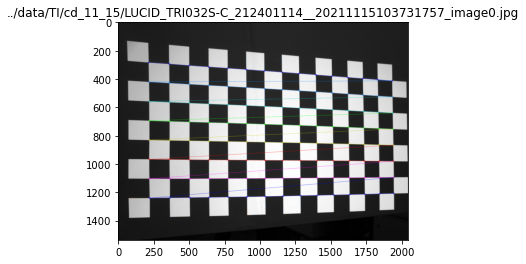

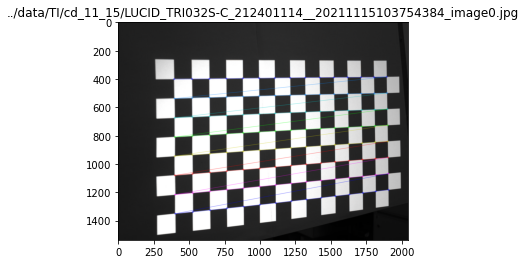

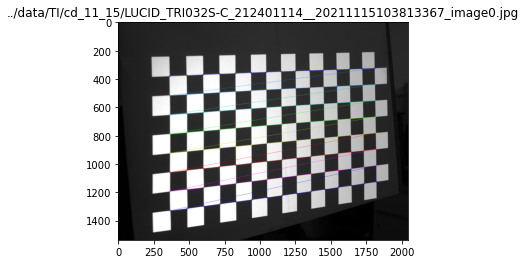

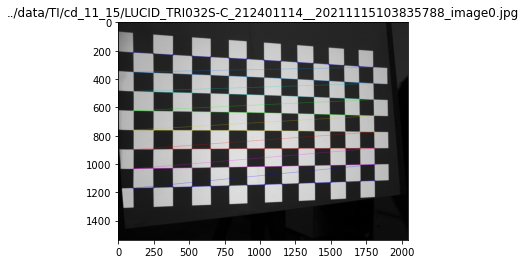

../data/TI/cd_11_15/LUCID_TRI032S-C_212401114__20211115103936443_image0.jpg _failed!


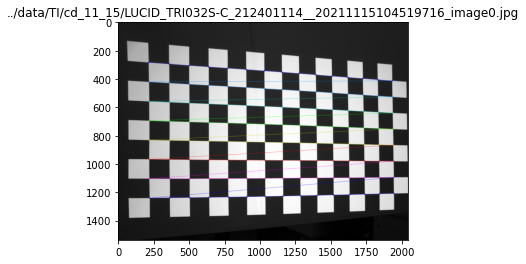

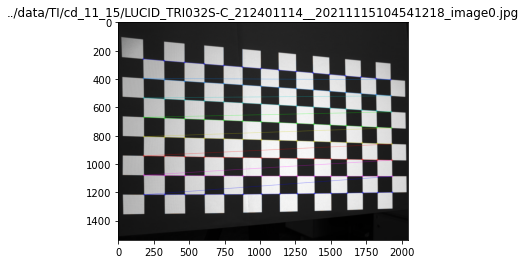

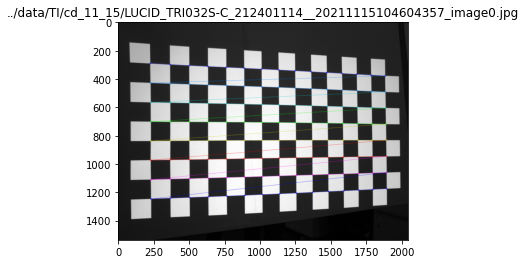

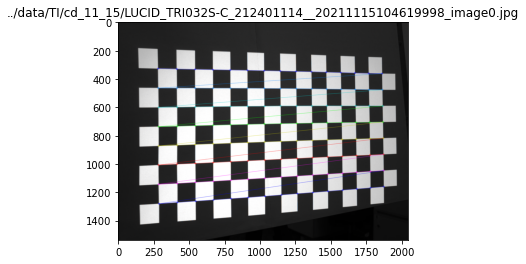

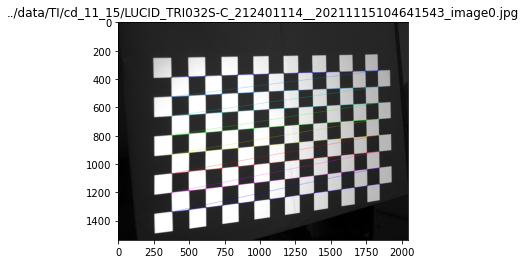

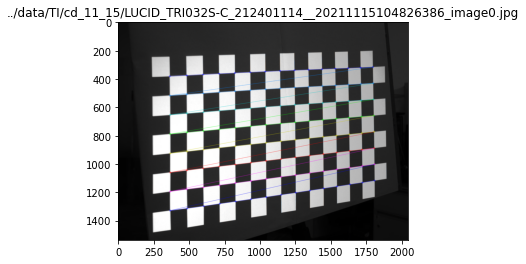

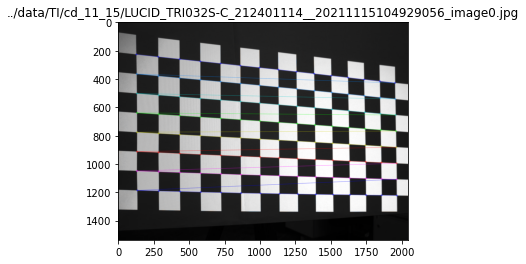

../data/TI/cd_11_15/LUCID_TRI032S-C_212401114__20211115104945712_image0.jpg _failed!


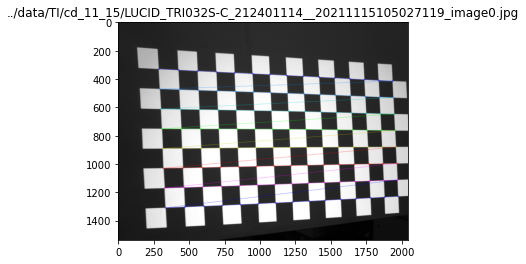

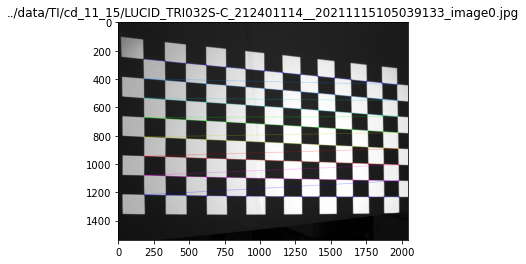

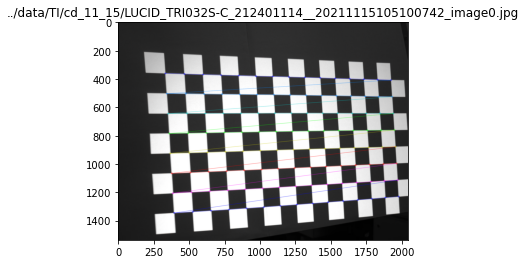

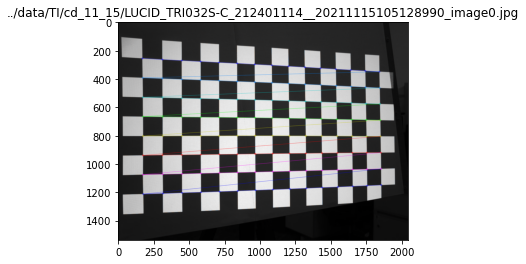

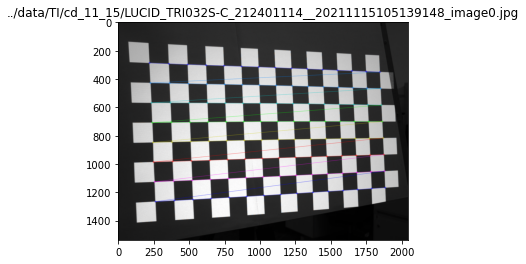

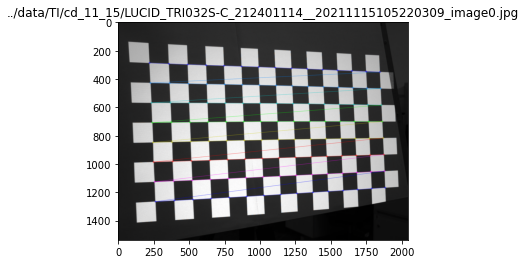

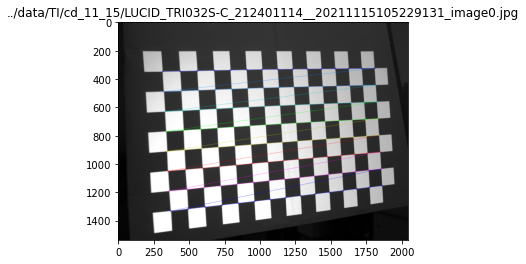

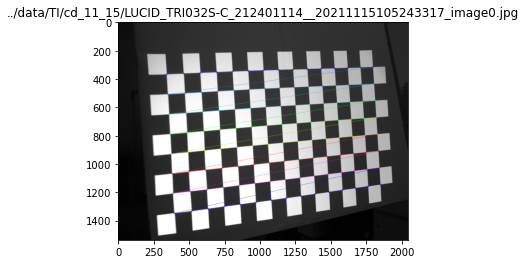

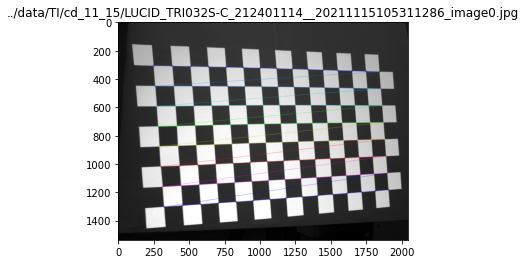

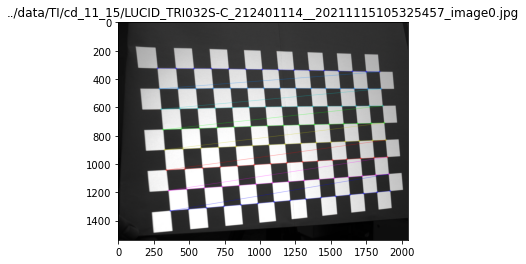

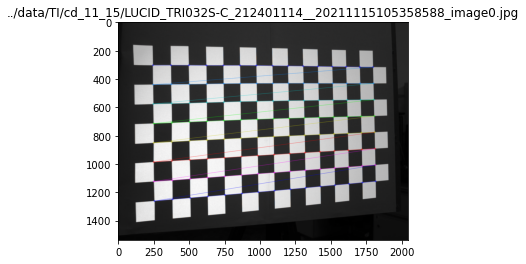

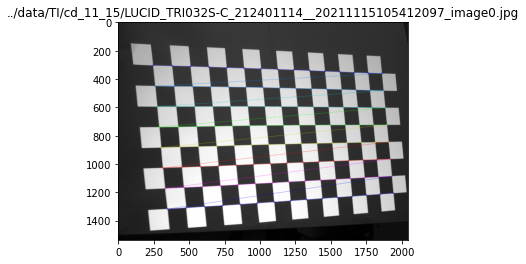

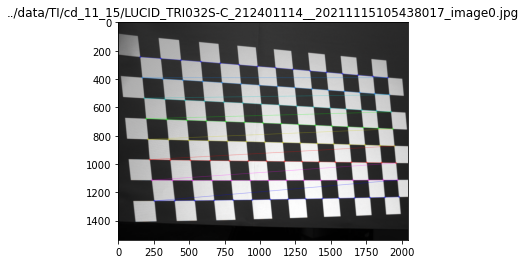

sum images extract number: 25


In [38]:
chessboard_size = (15, 8)
corner_size = (80., 80.)
scale = 4
i = 0
for name in img_set[:27]:
	img = cv2.imread(name,0)
	vis = cv2.cvtColor(img, cv2.COLOR_BAYER_GR2RGB)
	img = 255 - img
	# ret,corners = cv2.findChessboardCorners(img, (chessboard_size[0], chessboard_size[1]), cv2.CALIB_CB_ADAPTIVE_THRESH)
	scaled_img = cv2.resize(img, (img.shape[1]//scale, img.shape[0]//scale))
	ret,corners = cv2.findChessboardCorners(scaled_img, (chessboard_size[0], chessboard_size[1]), cv2.CALIB_CB_ADAPTIVE_THRESH)
	if ret:
		corners = corners * scale
		cv2.cornerSubPix(img, corners, (11,11), (-1, -1), (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER,30,0.1))
		cv2.drawChessboardCorners(vis, (chessboard_size[0], chessboard_size[1]), corners, ret)
		i += 1
		plt.imshow(vis)
		plt.title(name)
		plt.show()
	else:
		print(name, "_failed!")
print("sum images extract number:", i)

In [34]:
corners.shape

(120, 1, 2)

120